In [ ]:
!pip install earthy gdal

SATELLITE IMAGERY ANALYSIS WITH PYHON 


I will walk you through a satellite imagery analysis task over the Sundarbans forest in India. The Google map below shows the Sundarbans region. We will perform satellite imagery analysis on this region so you should know what it is before we get started with the task.

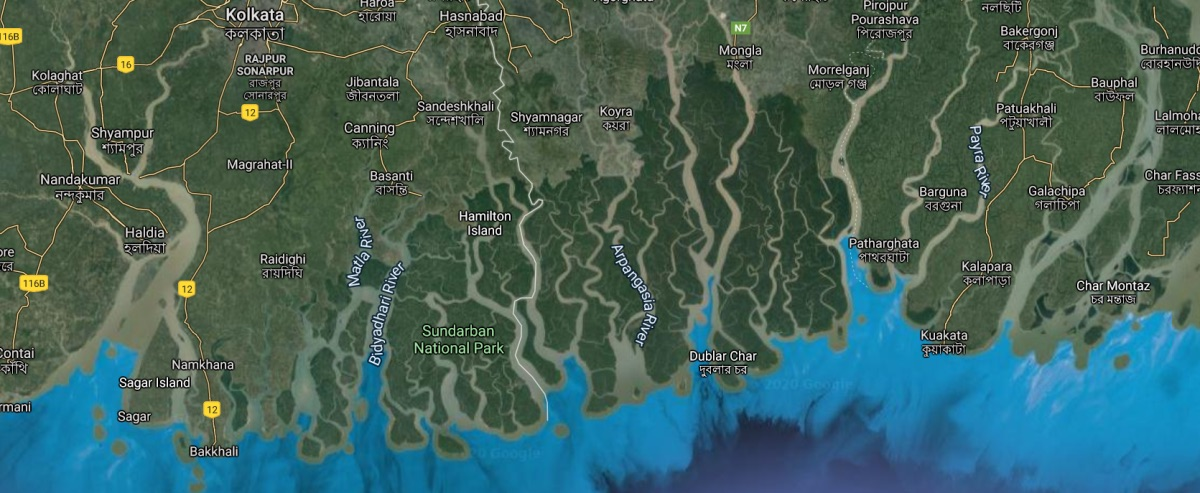

this task, I will be using a very small part of the Sundarbans region for the task of analyzing satellite imagery with Python. I’ll be using a small portion of the Sundarbans satellite data that is acquired using the Sentinel-2 satellite.

The dataset I am using is in the form of 954×298 pixels, with 12 bands with a spectral resolution varying from 10 to 60 meters. Now let’s import the necessary Python libraries and dataset to begin the task of analyzing satellite images with Python:

In [ ]:
from glob import glob
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
np.seterr(divide='ignore', invalid='ignore')
S_sentinel_bands = glob(IMPORT DATASET)
S_sentinel_bands.sort()

As I stated in the above section that the dataset contains 12 bands now let’s visualize them to see what we are going to work with:

In [ ]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))
arr_st = np.stack(l)
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

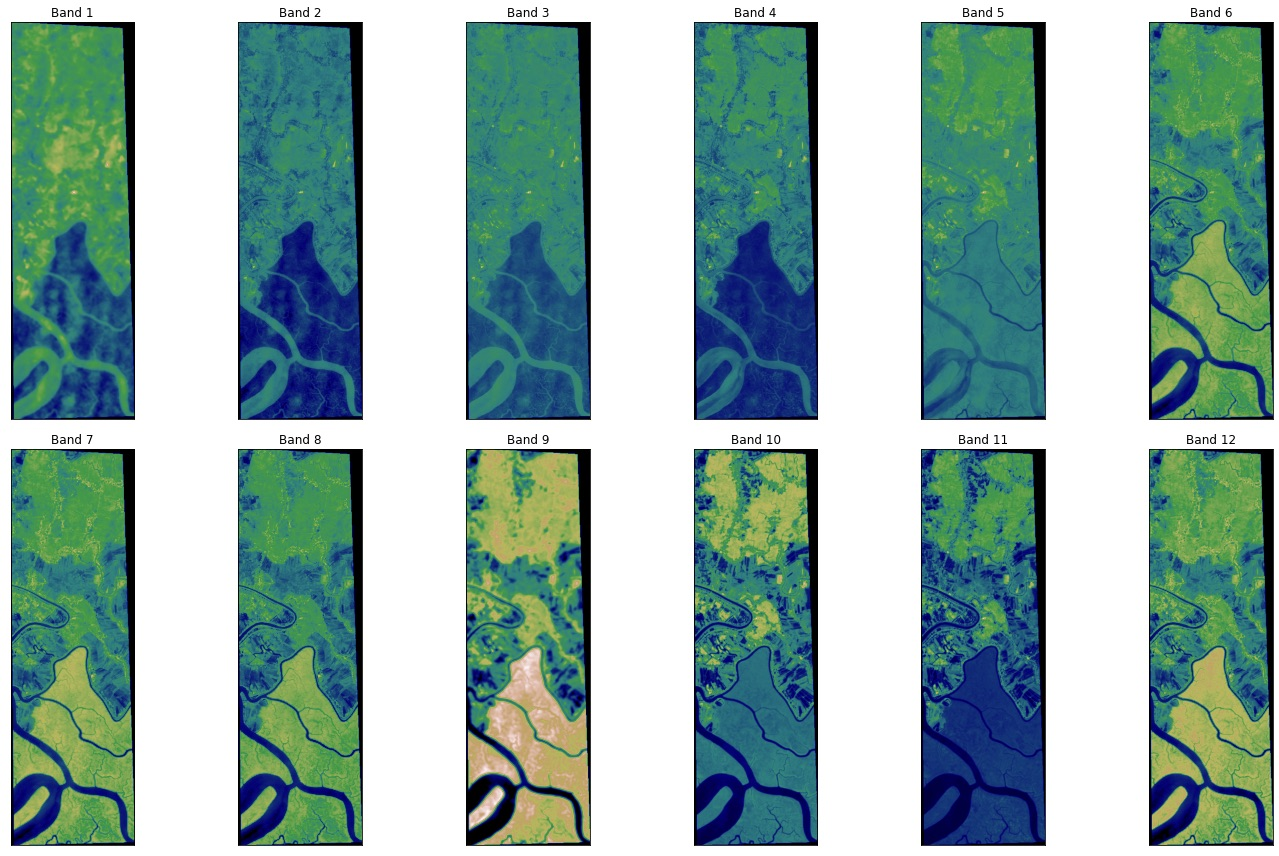

This dataset has several numbers of bands that contain data ranging from visible to infrared. It is therefore difficult to visualize the data for humans. Creating an RGB composite image facilitates an effective understanding of the data:

In [ ]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16), 
                  # title='RGB Composite Image'
                  )

plt.show()

ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(10, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

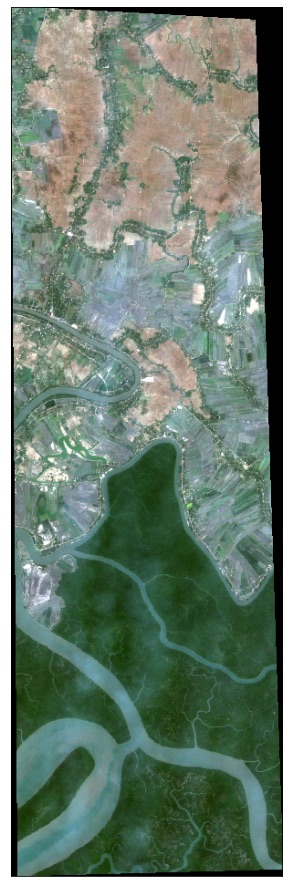

bold text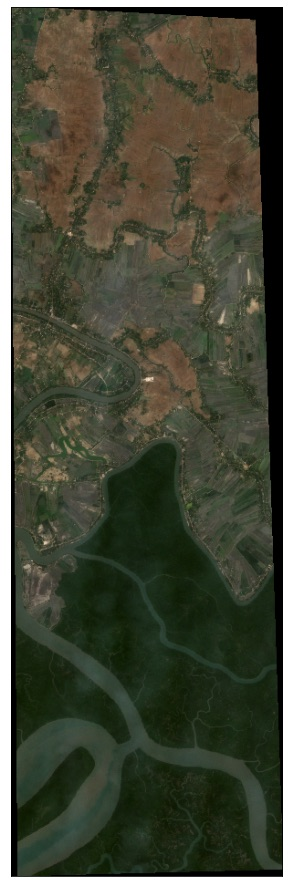

Now let’s visualize the histogram of the dataset which will help us to understand the distribution of the values of the bands:

In [ ]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

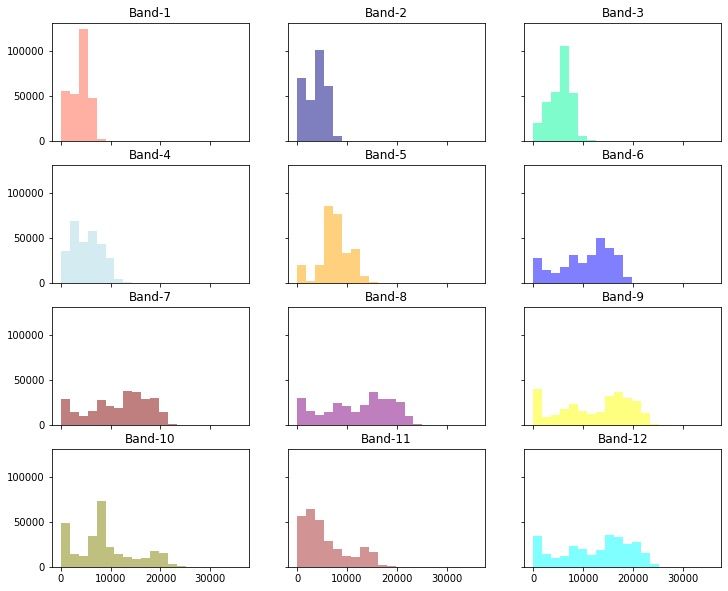

Analyzing the Vegetation Index:

Now as a task of analyzing images I will analyze the vegetation of the Sundarbans region:

In [ ]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

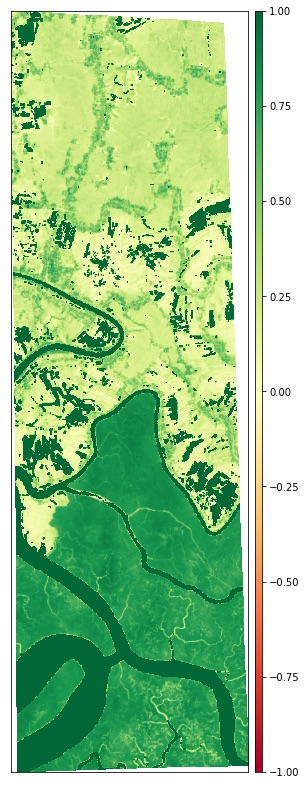

When you have negative values it is probably water. On the other hand, if you have an NDVI value close to +1, it may be dense green leaves. But when the NDVI is close to zero, there are no green leaves and it might even be an urbanized area.